# 🧠 Lung Cancer Detector using CNN


# Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

from zipfile import ZipFile
import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')


# Step 2: Importing Dataset

In [4]:
from zipfile import ZipFile

data_path = 'lung-and-colon-cancer-histopathological-images.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


# Step 3: Visualizing the Data

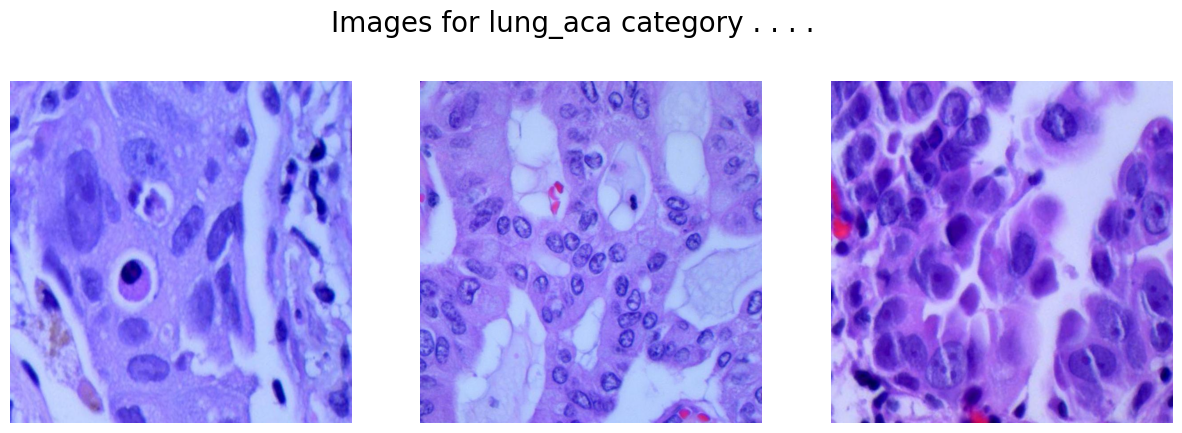

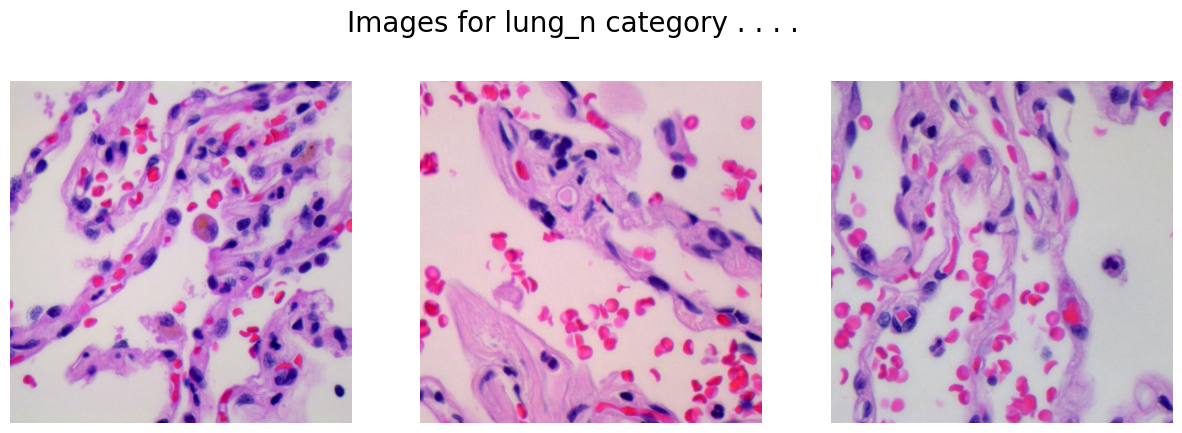

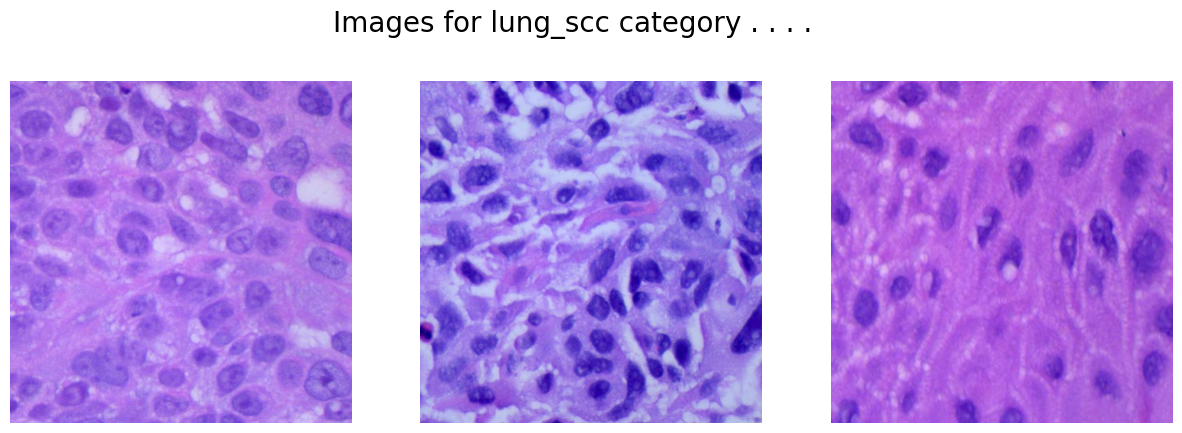

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define path and categories
path = './lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)

# Plot 3 sample images per class
for cat in classes:
    image_dir = os.path.join(path, cat)
    images = os.listdir(image_dir)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

    for i in range(3):
        k = np.random.randint(0, len(images))
        img_path = os.path.join(image_dir, images[k])
        img = np.array(Image.open(img_path))
        ax[i].imshow(img)
        ax[i].axis('off')
    
    plt.show()


# Step 4: Preparing the Dataset

In [10]:
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64

X = []
Y = []

for i, cat in enumerate(classes):
    images = glob(f'{path}/{cat}/*.jpeg')

    for image in images:
        img = cv2.imread(image)
        X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
        Y.append(i)

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values

X_train, X_val, Y_train, Y_val = train_test_split(X, one_hot_encoded_Y, test_size=SPLIT, random_state=2022)

# Output to verify shapes
print(X_train.shape, X_val.shape)


(12000, 256, 256, 3) (3000, 256, 256, 3)


# Step 5: Model Development


In [12]:
model = keras.models.Sequential([
    layers.Conv2D(filters=32,
                  kernel_size=(5, 5),
                  activation='relu',
                  input_shape=(IMG_SIZE,
                               IMG_SIZE,
                               3),
                  padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=128,
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,684,291 (128.50 MB)

 Trainable params: 33,683,523 (128.49 MB)

 Non-trainable params: 768 (3.00 KB)

# Step 6: Model Compilation

In [21]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Custom callback to stop training early if 90% validation accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.90:
            print('\nValidation accuracy has reached upto 90%, so stopping further training.')
            self.model.stop_training = True

# Early stopping to avoid overfitting
es = EarlyStopping(
    patience=3,
    monitor='val_accuracy',
    restore_best_weights=True
)

# Reduce learning rate when a metric has stopped improving
lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    factor=0.5,
    verbose=1
)

# ✅ Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Step 7: Model Training

In [17]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.8172 - loss: 0.4358 - val_accuracy: 0.3257 - val_loss: 5.7239
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 609s 3s/step - accuracy: 0.9145 - loss: 0.2173 - val_accuracy: 0.6680 - val_loss: 4.2157
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 633s 3s/step - accuracy: 0.9200 - loss: 0.1967 - val_accuracy: 0.6423 - val_loss: 5.2411
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 642s 3s/step - accuracy: 0.9371 - loss: 0.1600 - val_accuracy: 0.8483 - val_loss: 0.6508
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1586s 8s/step - accuracy: 0.9518 - loss: 0.1137 - val_accuracy: 0.7960 - val_loss: 1.1301
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 644s 3s/step - accuracy: 0.9668 - loss: 0.0913 - val_accuracy: 0.7973 - val_loss: 1.0030
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 630s 3s/step - accuracy: 0.9684 - loss: 0.0838 - val_accuracy: 0.7947 - val_loss: 1.2509
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 642s 3s/step - accuracy: 0.9795 - loss: 0.0587 - val_acc

# Step 8: Visualizing

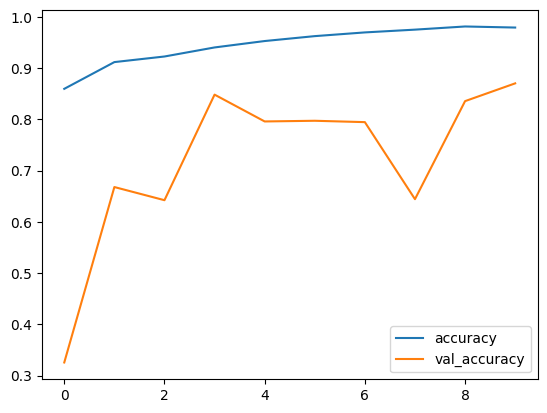

In [18]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

# Step 9: Model Evaluation

In [19]:
Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)
print(metrics.classification_report(Y_val, Y_pred,
                                    target_names=classes))

94/94 ━━━━━━━━━━━━━━━━━━━━ 35s 371ms/step
              precision    recall  f1-score   support

    lung_aca       0.72      0.98      0.83       987
      lung_n       1.00      0.97      0.98       977
    lung_scc       0.97      0.68      0.80      1036

    accuracy                           0.87      3000
   macro avg       0.90      0.87      0.87      3000
weighted avg       0.90      0.87      0.87      3000

